In [727]:
import cv2
import numpy as np
import os
import json
from matplotlib import pyplot as plt

with open("data/input.json", "r") as f:
    input_data = json.load(f)

image_paths = input_data["image_files"]
image_num = 1

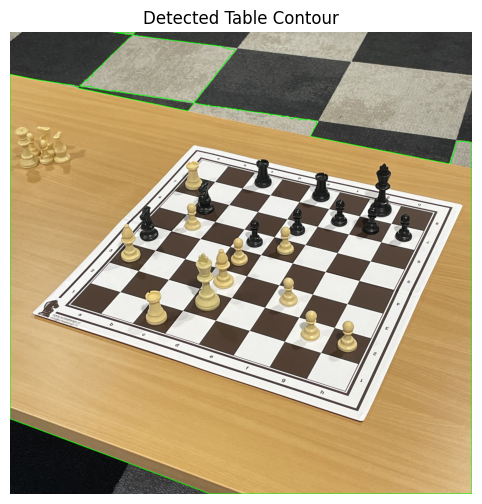

In [728]:
image = cv2.imread(image_paths[image_num])

hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

lower_brown = np.array([0, 22, 107])
upper_brown = np.array([30, 255, 255])

mask = cv2.inRange(hsv, lower_brown, upper_brown)

kernel = np.ones((5, 5), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

table_contour = max(contours, key=cv2.contourArea)

contour_image = image.copy()
cv2.drawContours(contour_image, [table_contour], -1, (0, 255, 0), 3)

contour_rgb = cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8, 6))
plt.title("Detected Table Contour")
plt.imshow(contour_rgb)
plt.axis('off')
plt.show()


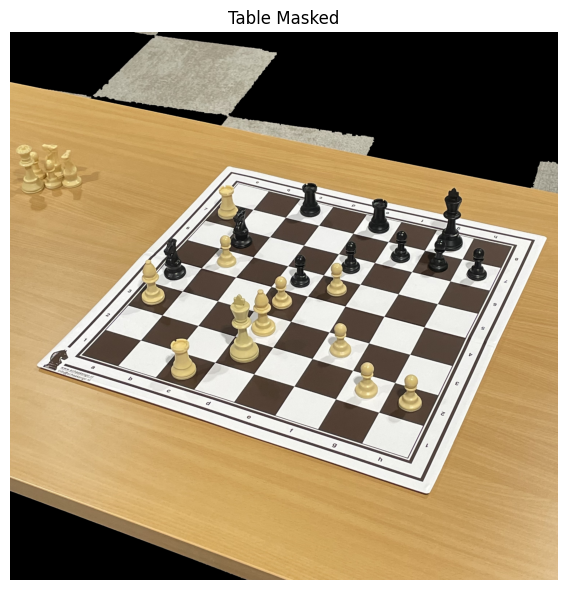

In [729]:
table_mask = np.zeros_like(image)
cv2.drawContours(table_mask, [table_contour], -1, (255, 255, 255), thickness=cv2.FILLED)
masked_image = cv2.bitwise_and(image, table_mask)

masked_rgb = cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB)

# Display both results side-by-side
plt.figure(figsize=(12, 6))

plt.plot(1, 2, 2)
plt.title("Table Masked")
plt.imshow(masked_rgb)
plt.axis('off')

plt.tight_layout()
plt.show()


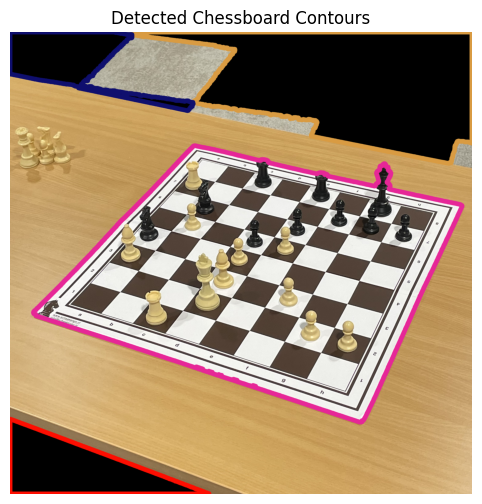

In [730]:
hsv = cv2.cvtColor(masked_image, cv2.COLOR_BGR2HSV)

table_color_mask = cv2.inRange(hsv, lower_brown, upper_brown)
chessboard_mask = cv2.bitwise_not(table_color_mask)

kernel = np.ones((3, 3), np.uint8)
chessboard_mask = cv2.morphologyEx(chessboard_mask, cv2.MORPH_CLOSE, kernel)
chessboard_mask = cv2.morphologyEx(chessboard_mask, cv2.MORPH_OPEN, kernel, iterations=2)

contours_, _ = cv2.findContours(chessboard_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
height, width = chessboard_mask.shape[:2]


# draw contours on the original image
contour_image = masked_image.copy()
for contour in contours_:
    random_color = tuple(np.random.randint(0, 255, 3).tolist())

    cv2.drawContours(contour_image, [contour], -1, random_color, 30)
contour_rgb = cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8, 6))
plt.title("Detected Chessboard Contours")
plt.imshow(contour_rgb)
plt.axis('off')
plt.show()




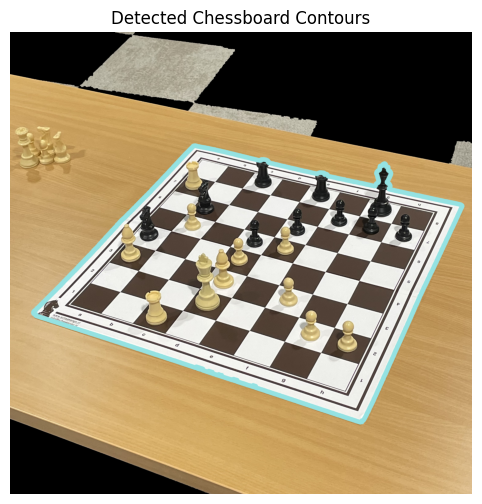

In [731]:

def is_touching_border(contour, width, height):
    for point in contour:
        x, y = point[0]
        if x <= 1 or y <= 1 or x >= width - 2 or y >= height - 2:
            return True
    return False

contours = [cnt for cnt in contours_ if not is_touching_border(cnt, width, height)]


# draw contours on the original image
contour_image = masked_image.copy()
for contour in contours:
    random_color = tuple(np.random.randint(0, 255, 3).tolist())

    cv2.drawContours(contour_image, [contour], -1, random_color, 30)
contour_rgb = cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8, 6))
plt.title("Detected Chessboard Contours")
plt.imshow(contour_rgb)
plt.axis('off')
plt.show()


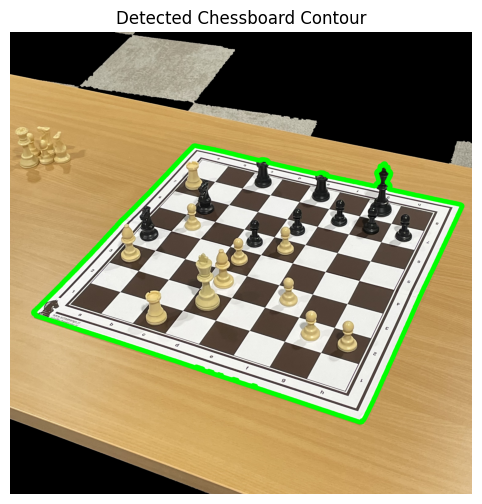

In [732]:
chessboard_countor = max(contours, key=cv2.contourArea)

# draw contours on the original image
contour_image = masked_image.copy()
cv2.drawContours(contour_image, [chessboard_countor], -1, (0, 255, 0), 30)
contour_rgb = cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8, 6))
plt.title("Detected Chessboard Contour")
plt.imshow(contour_rgb)
plt.axis('off')
plt.show()

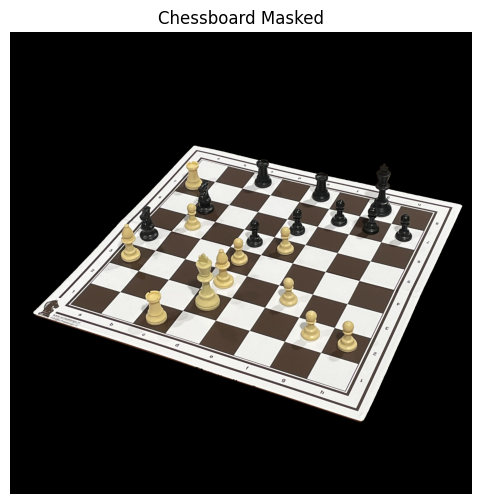

In [733]:
## aply mask to the image
chessboard_mask = np.zeros_like(image)
cv2.drawContours(chessboard_mask, [chessboard_countor], -1, (255, 255, 255), thickness=cv2.FILLED)
masked_image = cv2.bitwise_and(image, chessboard_mask)
masked_rgb = cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8, 6))
plt.title("Chessboard Masked")
plt.imshow(masked_rgb)
plt.axis('off')
plt.show()

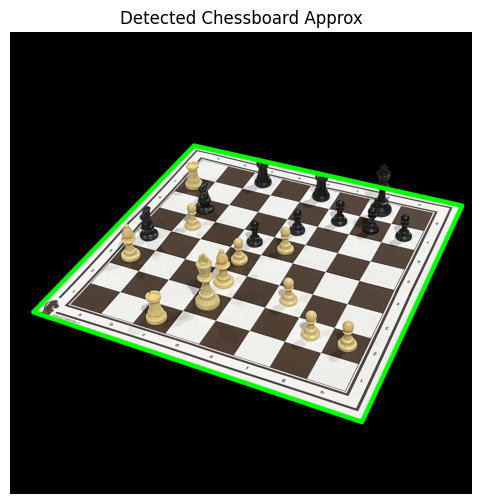

In [734]:
approx = cv2.approxPolyDP(chessboard_countor, 0.06 * cv2.arcLength(chessboard_countor, True), True)

# draw contours on the original image
contour_image = masked_image.copy()
cv2.drawContours(contour_image, [approx], -1, (0, 255, 0), 30)
contour_rgb = cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8, 6))
plt.title("Detected Chessboard Approx")
plt.imshow(contour_rgb)
plt.axis('off')
plt.show()

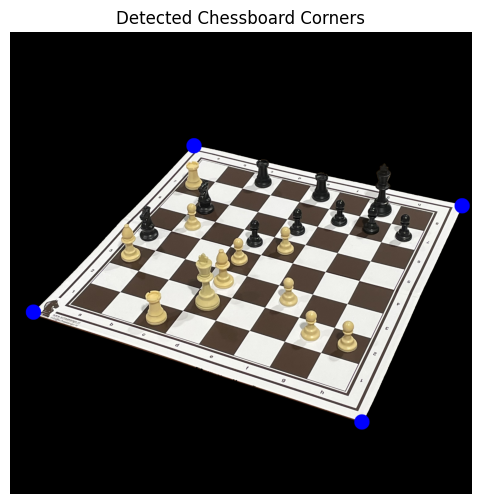

In [735]:
corners = approx.reshape(4, 2)
corners = corners[np.argsort(corners[:, 0])]


left_corners = corners[:2]

top_left = left_corners[np.argmin(left_corners[:, 1])]
bottom_left = left_corners[np.argmax(left_corners[:, 1])]

right_corners = corners[2:]
top_right = right_corners[np.argmin(right_corners[:, 1])]
bottom_right = right_corners[np.argmax(right_corners[:, 1])]


ordered_corners = [top_left, top_right, bottom_right, bottom_left]

# draw contours on the original image
corner_image = masked_image.copy()
for corner in ordered_corners:
    cv2.circle(corner_image, tuple(corner), 50, (255,0,0), -1)

corner_rgb = cv2.cvtColor(corner_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8, 6))
plt.title("Detected Chessboard Corners")
plt.imshow(corner_rgb)
plt.axis('off')
plt.show()

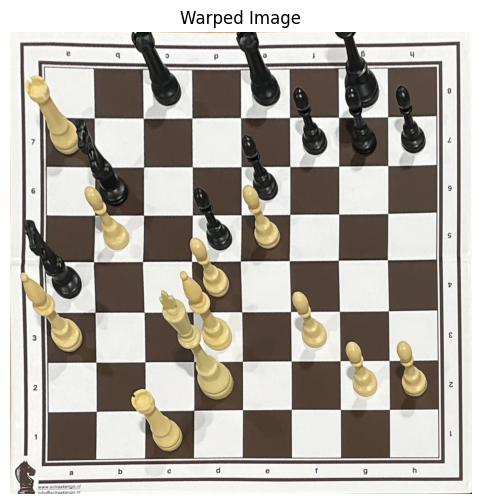

In [736]:
output_size = 3024

dst = np.array([
        [0, 0],
        [output_size - 1, 0],
        [output_size - 1, output_size - 1],
        [0, output_size - 1]
    ], dtype="float32")

M = cv2.getPerspectiveTransform(np.array(ordered_corners, dtype="float32"), dst)
warped = cv2.warpPerspective(image, M, (output_size, output_size))
warped_rgb = cv2.cvtColor(warped, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8, 6))
plt.title("Warped Image")   
plt.imshow(warped_rgb)
plt.axis('off')
plt.show()

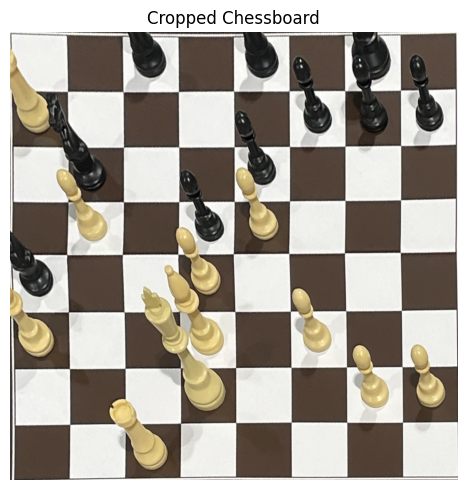

In [737]:
def crop_with_padding(image, padding=0):
    h, w = image.shape[:2]
    top = bottom = left = right = padding

    if padding > 0:
        top = bottom = left = right = padding

    cropped_image = image[top:h-bottom, left:w-right]
    return cropped_image

cropped_chessboard = crop_with_padding(warped, padding=220)

plt.figure(figsize=(10, 5))
plt.title("Cropped Chessboard")
plt.imshow(cv2.cvtColor(cropped_chessboard, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.tight_layout()
plt.show()

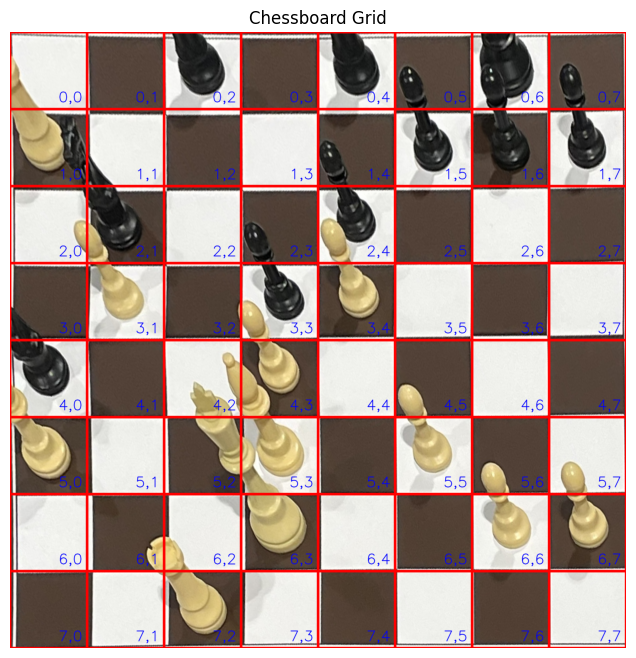

In [738]:
def draw_chess_grid(image, rows=8, cols=8):
    image_copy = image.copy()
    h, w = image.shape[:2]
    cell_height = h // rows
    cell_width = w // cols

    cell_coords = []

    for i in range(rows):
        for j in range(cols):
            x1, y1 = j * cell_width, i * cell_height
            x2, y2 = (j + 1) * cell_width, (i + 1) * cell_height

            cell_coords.append({
                "row": i,
                "col": j,
                "bbox": (x1, y1, x2, y2)
            })

            cv2.rectangle(image_copy, (x1, y1), (x2, y2), (0, 0, 255), 10) 
            cv2.putText(image_copy, f"{i},{j}", (x2 - 120, y2 - 30),
                        cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 0, 0), 2, cv2.LINE_AA) 

    return image_copy, cell_coords



annotated_image, grid_info = draw_chess_grid(cropped_chessboard)

plt.figure(figsize=(8, 8))
plt.title("Chessboard Grid")
plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


In [739]:
def detect_single_piece_per_cell(image, grid_info, central_ratio=0.45): 
    piece_positions = []
    image_copy = image.copy()
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    black_range = ((0, 0, 0), (180, 255, 50))
    cream_range = ((15, 30, 130), (40, 150, 255))

    black_count = 0
    cream_count = 0

    for cell in grid_info:
        x1, y1, x2, y2 = cell["bbox"]
        row, col = cell["row"], cell["col"]

        w = x2 - x1
        h = y2 - y1
        margin_x = int((1 - central_ratio) / 2 * w)
        margin_y = int((1 - central_ratio) / 2 * h)
        x1_c = x1 + margin_x
        y1_c = y1 + margin_y
        x2_c = x2 - margin_x
        y2_c = y2 - margin_y

        cell_hsv_patch = hsv[y1_c:y2_c, x1_c:x2_c]
        total_pixels = cell_hsv_patch.shape[0] * cell_hsv_patch.shape[1]

        mask_black = cv2.inRange(cell_hsv_patch, *black_range)
        mask_cream = cv2.inRange(cell_hsv_patch, *cream_range)

        count_black_pixels = cv2.countNonZero(mask_black)
        count_cream_pixels = cv2.countNonZero(mask_cream)
        occupied_pixels = count_black_pixels + count_cream_pixels

        occupied_ratio = occupied_pixels / total_pixels
        free_ratio = 1 - occupied_ratio

        if free_ratio >= 0.72:
            continue

        cell_patch = gray[y1:y2, x1:x2]
        blurred = cv2.GaussianBlur(cell_patch, (3, 3), 0)
        edges = cv2.Canny(blurred, 50, 150)
        contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        has_piece = False
        mid_area_detected = False
        top_feature_detected = False

        for cnt in contours:
            area = cv2.contourArea(cnt)
            if area > 1 and area < w * h:
                cx, cy = (x1 + x2) // 2, (y1 + y2) // 2
                point_from_bottom = False
                point_from_middle = False

                for point in cnt:
                    px, py = point[0]
                    px_global = px + x1
                    py_global = py + y1
                    if py <= 170:
                        point_from_middle = True
                    if py >= h - 40:
                        point_from_bottom = True
                    if point_from_bottom and point_from_middle:
                        continue
                    if 20 < py < 60 and 40 < px < 280:
                        top_feature_detected = True
                    if (cx - 80 <= px_global <= cx + 80) and (cy - 120 <= py_global <= cy + 80):
                        mid_area_detected = True
                        break

                if mid_area_detected and top_feature_detected:
                    has_piece = True
                    break

        if has_piece:  
            cv2.rectangle(image_copy, (x1, y1), (x2, y2), (0, 255, 0), 50)
            cx, cy = (x1 + x2) // 2, (y1 + y2) // 2
            cv2.circle(image_copy, (cx, cy), 3, (0, 0, 255), 40)

            if count_black_pixels > count_cream_pixels:
                piece_positions.append({"row": row, "col": col, "color": "Black"})
                black_count += 1
            else:
                piece_positions.append({"row": row, "col": col, "color": "White"})
                cream_count += 1


    return image_copy, piece_positions, black_count, cream_count


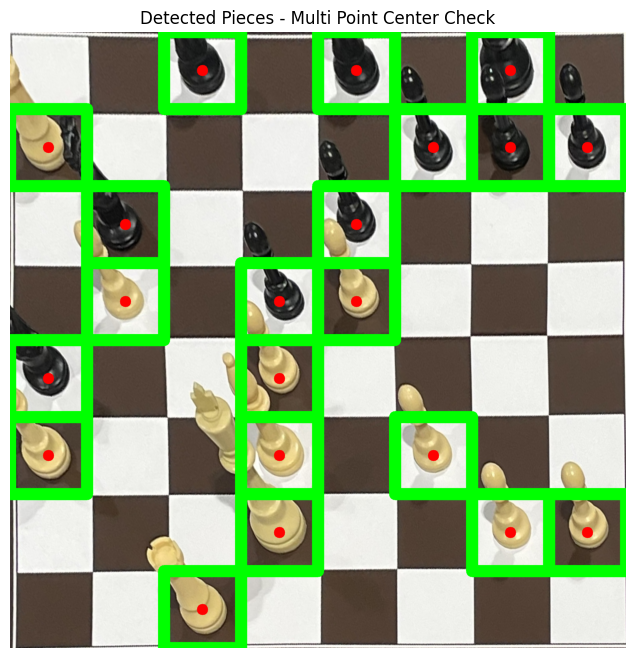

Black pieces: 10
White pieces: 11
Piece found at (0, 2) - Color: Black
Piece found at (0, 4) - Color: Black
Piece found at (0, 6) - Color: Black
Piece found at (1, 0) - Color: White
Piece found at (1, 5) - Color: Black
Piece found at (1, 6) - Color: Black
Piece found at (1, 7) - Color: Black
Piece found at (2, 1) - Color: Black
Piece found at (2, 4) - Color: Black
Piece found at (3, 1) - Color: White
Piece found at (3, 3) - Color: Black
Piece found at (3, 4) - Color: White
Piece found at (4, 0) - Color: Black
Piece found at (4, 3) - Color: White
Piece found at (5, 0) - Color: White
Piece found at (5, 3) - Color: White
Piece found at (5, 5) - Color: White
Piece found at (6, 3) - Color: White
Piece found at (6, 6) - Color: White
Piece found at (6, 7) - Color: White
Piece found at (7, 2) - Color: White


In [740]:
img_with_pieces, pieces, black_count, cream_count = detect_single_piece_per_cell(cropped_chessboard, grid_info)

matrix = np.zeros((8, 8), dtype=int)

plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(img_with_pieces, cv2.COLOR_BGR2RGB))
plt.title("Detected Pieces - Multi Point Center Check")
plt.axis("off")
plt.show()

print(f"Black pieces: {black_count}")
print(f"White pieces: {cream_count}")

for piece in pieces:
    matrix[piece["row"], piece["col"]] = 1
    print(f"Piece found at ({piece['row']}, {piece['col']}) - Color: {piece['color']}")

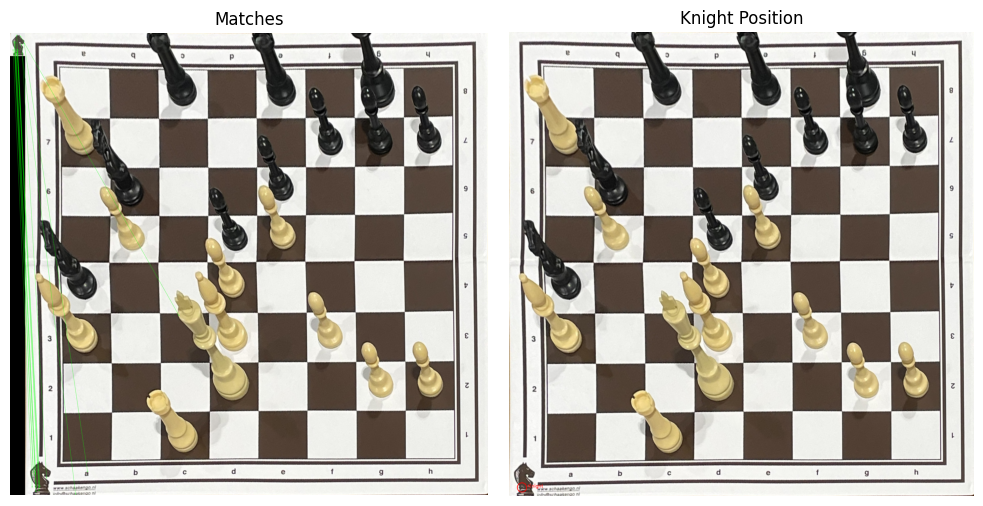

Knight found at position: (84, 2968)


In [741]:
# Load images
knight_gray = cv2.imread("knight.png", cv2.IMREAD_GRAYSCALE)
knight_color = cv2.imread("knight.png")
chessboard_gray = cv2.cvtColor(warped, cv2.COLOR_BGR2GRAY)
chessboard_color = warped.copy()

# SIFT detector
sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(knight_gray, None)
kp2, des2 = sift.detectAndCompute(chessboard_gray, None)

# FLANN matcher
index_params = dict(algorithm=1, trees=5)
search_params = dict(checks=50)
flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1, des2, k=2)

# Ratio test (Lowe's criterion)
good_matches = [m for m, n in matches if m.distance < 0.7 * n.distance]

# Draw matches
match_output = cv2.drawMatches(
    knight_color, kp1, chessboard_color, kp2, good_matches, None,
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS,
    matchColor=(0, 255, 0)
)

# Estimate knight position
if good_matches:
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 2)
    knight_pos = np.median(dst_pts, axis=0).astype(int)

    cv2.circle(chessboard_color, tuple(knight_pos), 30, (0, 0, 255), 3)
    cv2.putText(chessboard_color, "Knight", (knight_pos[0] + 40, knight_pos[1]),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

# Show results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Matches")
plt.imshow(cv2.cvtColor(match_output, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Knight Position")
plt.imshow(cv2.cvtColor(chessboard_color, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.tight_layout()
plt.show()

# Output position
if good_matches:
    print(f"Knight found at position: {tuple(knight_pos)}")
else:
    print("Knight not found – try adjusting the ratio threshold.")


Knight position: (84, 2968) | Center: (1512, 1512)
Rotating 0º to place the knight in the bottom-left corner


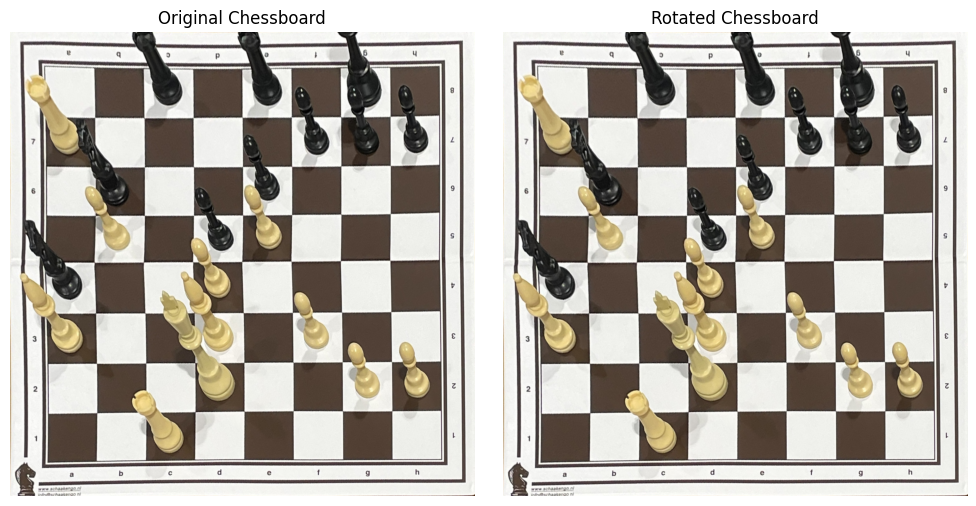

In [742]:
def rotate_knight_to_bottom_left(image, knight_pos):
    h, w = image.shape[:2]
    cx, cy = w // 2, h // 2
    
    x, y = knight_pos 

    print(f"Knight position: ({x}, {y}) | Center: ({cx}, {cy})")

    if x < cx and y < cy:
        angle = 90  
    elif x >= cx and y < cy:
        angle = 180 
    elif x >= cx and y >= cy:
        angle = 270 
    else:
        angle = 0  

    print(f"Rotating {angle}º to place the knight in the bottom-left corner")

    if angle == 90:
        rotated = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)
    elif angle == 180:
        rotated = cv2.rotate(image, cv2.ROTATE_180) 
    elif angle == 270:
        rotated = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE) 
    else:
        rotated = image.copy() 

    return rotated, angle


rotated_chessboard, rotation_angle = rotate_knight_to_bottom_left(warped, knight_pos)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Chessboard")
plt.imshow(warped_rgb)
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title("Rotated Chessboard")
plt.imshow(cv2.cvtColor(rotated_chessboard, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.tight_layout()
plt.show()

Matrix before rotation:

[[0 0 1 0 1 0 1 0]
 [1 0 0 0 0 1 1 1]
 [0 1 0 0 1 0 0 0]
 [0 1 0 1 1 0 0 0]
 [1 0 0 1 0 0 0 0]
 [1 0 0 1 0 1 0 0]
 [0 0 0 1 0 0 1 1]
 [0 0 1 0 0 0 0 0]]


No rotation needed for the matrix.

Matrix after rotation:

[[0 0 1 0 1 0 1 0]
 [1 0 0 0 0 1 1 1]
 [0 1 0 0 1 0 0 0]
 [0 1 0 1 1 0 0 0]
 [1 0 0 1 0 0 0 0]
 [1 0 0 1 0 1 0 0]
 [0 0 0 1 0 0 1 1]
 [0 0 1 0 0 0 0 0]]


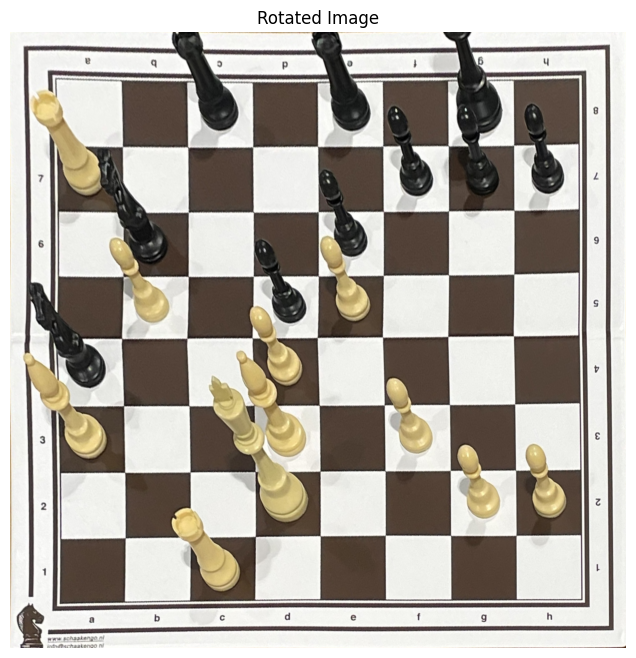

In [743]:
# Since we now dont rotate the image according to the knight position because its easier to detect the pieces in the chessboard, so we need to rotate the matrix according to the rotation angle

print("Matrix before rotation:\n")
print(matrix)
print("\n")

if rotation_angle == 90:
    print(f"Rotating the matrix {rotation_angle}º Counterclockwise")
    matrix = np.rot90(matrix, k=1)
elif rotation_angle == 180:
    print(f"Rotating the matrix {rotation_angle}º")
    matrix = np.rot90(matrix, k=2)
elif rotation_angle == 270:
    print(f"Rotating the matrix {rotation_angle}º Counterclockwise")
    matrix = np.rot90(matrix, k=3)
else:
    print(f"No rotation needed for the matrix.\n")

print("Matrix after rotation:\n")
print(matrix)


plt.figure(figsize=(8, 8))
plt.title("Rotated Image")
plt.imshow(cv2.cvtColor(rotated_chessboard, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

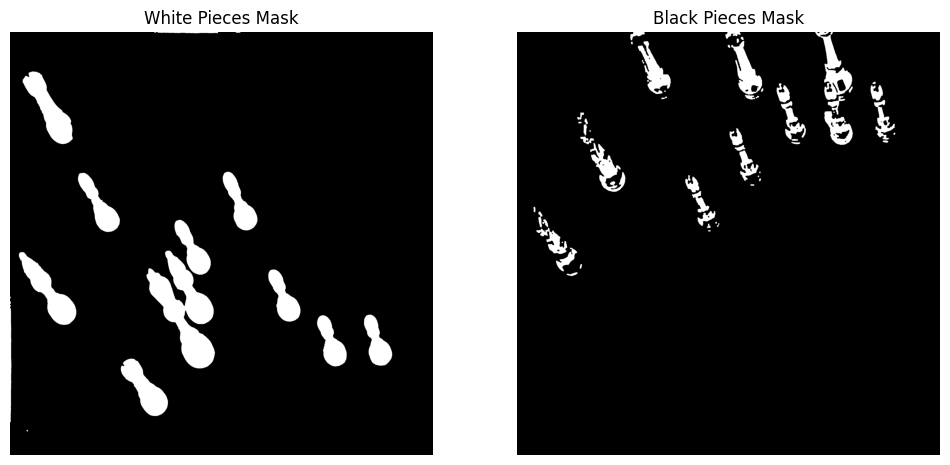

In [744]:
def isolate_white_pieces(img):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    lower_white = np.array([10, 30, 100])
    upper_white = np.array([40, 180, 255])
    mask = cv2.inRange(hsv, lower_white, upper_white)
    return mask

def isolate_black_pieces(img):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    lower_black = np.array([0, 0, 0])
    upper_black = np.array([180, 255, 40])
    mask = cv2.inRange(hsv, lower_black, upper_black)
    return mask

def clean_white_mask(mask):
    kernel = np.ones((5, 5), np.uint8)
    cleaned = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=2)
    cleaned = cv2.morphologyEx(cleaned, cv2.MORPH_CLOSE, kernel, iterations=1)
    return cleaned

def clean_black_mask(mask):
    kernel = np.ones((5, 5), np.uint8)
    cleaned = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=2)
    cleaned = cv2.morphologyEx(cleaned, cv2.MORPH_CLOSE, kernel, iterations=1)
    return cleaned

hsv = cv2.cvtColor(warped, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)
v_blurred = cv2.GaussianBlur(v, (11, 11), 0)
hsv_blurred = cv2.merge([h, s, v_blurred])
smoothed = cv2.cvtColor(hsv_blurred, cv2.COLOR_HSV2BGR)

white_mask = isolate_white_pieces(smoothed)
white_mask = clean_white_mask(white_mask)
black_mask = isolate_black_pieces(smoothed)
black_mask = clean_black_mask(black_mask)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("White Pieces Mask")
plt.imshow(white_mask, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Black Pieces Mask")
plt.imshow(black_mask, cmap='gray')
plt.axis('off')
plt.show()


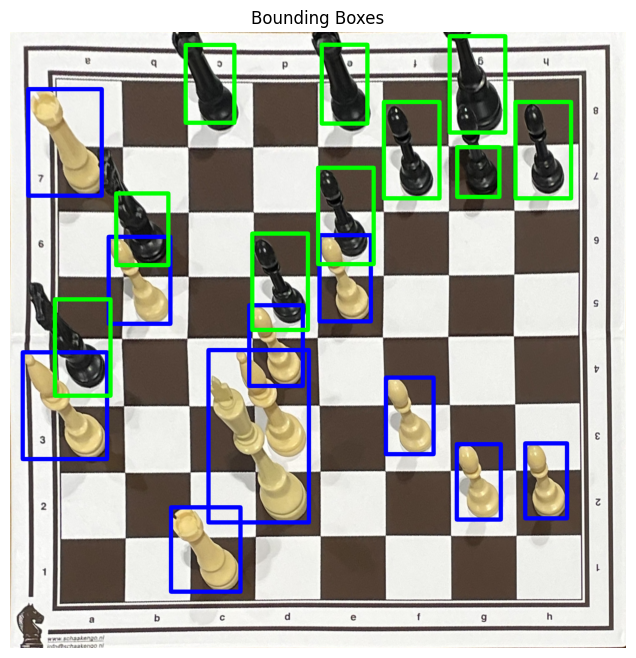

In [745]:
def get_clean_bounding_boxes(pieces_mask, min_area=25000, dilate_iter=2, pieces=None, grid_info=None):

    # 1. Detect contours
    contours, _ = cv2.findContours(pieces_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    mask_fused = np.zeros_like(pieces_mask)
    cv2.drawContours(mask_fused, contours, -1, 255, thickness=cv2.FILLED)

    # 2. Dilate the mask to merge close contours
    kernel = np.ones((3, 3), np.uint8)
    mask_fused = cv2.dilate(mask_fused, kernel, iterations=dilate_iter)

    final_contours, _ = cv2.findContours(mask_fused, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    h, w = pieces_mask.shape

    # 3. Bounding boxes
    bounding_boxes = []
    for cnt in final_contours:
        area = cv2.contourArea(cnt)
        if area > min_area:
            x, y, width, height = cv2.boundingRect(cnt)
            x2 = x + width
            y2 = y + height

            margin = 1  # pixels to avoid touching the edges
            # Check if the bounding box is too close to the edges of the image
            if x <= margin or y <= margin or x2 >= w - margin or y2 >= h - margin:
                continue

            bounding_boxes.append([x, y, x2, y2])


    # 4. Fallback: if no bounding boxes found, use piece positions
    if pieces is not None and grid_info is not None:
        for piece in pieces:
            row, col = piece["row"], piece["col"]
            cell = next(c for c in grid_info if c["row"] == row and c["col"] == col)
            x1, y1, x2, y2 = list(cell["bbox"])

            # Verify if the piece is already detected
            already_detected = False
            for bx in bounding_boxes:
                iou_x1 = max(x1, bx[0])
                iou_y1 = max(y1, bx[1])
                iou_x2 = min(x2, bx[2])
                iou_y2 = min(y2, bx[3])
                intersection = max(0, iou_x2 - iou_x1) * max(0, iou_y2 - iou_y1)
                cell_area = (x2 - x1) * (y2 - y1)
                if intersection / (cell_area + 1e-5) > 0.05:
                    already_detected = True
                    break

            if not already_detected:
                extra_top = 200  # pixels above
                less_bottom = -50  # pixels below
                less_right = -50  # pixels to the right
                y1_exp = max(0, y1 - extra_top)
                y2_exp = min(pieces_mask.shape[0], y2 + less_bottom)
                x2_exp = min(pieces_mask.shape[1], x2 + less_right)

                adjusted_box = [x1, y1_exp, x2_exp, y2_exp]
                bounding_boxes.append(adjusted_box)


    return bounding_boxes



def merge_close_bounding_boxes(boxes, max_distance=125):
    if not boxes:
        return []

    boxes = [np.array(box) for box in boxes]
    merged = []
    used = [False] * len(boxes)

    for i in range(len(boxes)):
        if used[i]:
            continue

        x1, y1, x2, y2 = boxes[i]
        current = [x1, y1, x2, y2]
        used[i] = True

        for j in range(i + 1, len(boxes)):
            if used[j]:
                continue

            xx1, yy1, xx2, yy2 = boxes[j]
            if ((abs(x1 - xx1) < max_distance or abs(x2 - xx2) < max_distance) and (abs(y1 - yy1) < max_distance or abs(y2 - yy2) < max_distance)):
                current[0] = min(current[0], xx1)
                current[1] = min(current[1], yy1)
                current[2] = max(current[2], xx2)
                current[3] = max(current[3], yy2)
                used[j] = True

        merged.append(current)

    return merged

white_pieces = [piece for piece in pieces if piece["color"] == "White"]
black_pieces = [piece for piece in pieces if piece["color"] == "Black"]

# create the grid info without cropped image that needs to add the padding of 220 to the cells so we can use the same grid info for the cropped image
grid_info_without_cropped = []
for cell in grid_info:
    x1, y1, x2, y2 = cell["bbox"]
    x1 += 220
    y1 += 220
    x2 += 220
    y2 += 220
    grid_info_without_cropped.append({
        "row": cell["row"],
        "col": cell["col"],
        "bbox": (x1, y1, x2, y2)
    })


white_bounding_boxes = get_clean_bounding_boxes(white_mask, pieces=white_pieces, grid_info=grid_info_without_cropped)
white_bounding_boxes = merge_close_bounding_boxes(white_bounding_boxes)
black_bounding_boxes = get_clean_bounding_boxes(black_mask, pieces=black_pieces, grid_info=grid_info_without_cropped)
black_bounding_boxes = merge_close_bounding_boxes(black_bounding_boxes)

warped_copy = warped.copy()
for box in white_bounding_boxes:
    cv2.rectangle(warped_copy, (box[0], box[1]), (box[2], box[3]), (255, 0, 0), 20)
for box in black_bounding_boxes:
    cv2.rectangle(warped_copy, (box[0], box[1]), (box[2], box[3]), (0, 255, 0), 20)

plt.figure(figsize=(8, 8))
plt.title("Bounding Boxes")
plt.imshow(cv2.cvtColor(warped_copy, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


X1: 835, Y1: 1677, X2: 1060, Y2: 1936
X1: 1895, Y1: 1813, X2: 2052, Y2: 2040
X1: 2143, Y1: 1880, X2: 2294, Y2: 2112
X1: 1748, Y1: 1599, X2: 1909, Y2: 1812
X1: 653, Y1: 1252, X2: 908, Y2: 1520
X1: 1125, Y1: 1392, X2: 1479, Y2: 1844
X1: 1416, Y1: 1341, X2: 1586, Y2: 1542
X1: 1104, Y1: 1116, X2: 1287, Y2: 1313
X1: 1726, Y1: 1267, X2: 1890, Y2: 1471
X1: 1088, Y1: 835, X2: 1295, Y2: 1044
X1: 1204, Y1: 1050, X2: 1354, Y2: 1207
X1: 2297, Y1: 1214, X2: 2410, Y2: 1337
X1: 1593, Y1: 865, X2: 1731, Y2: 1015
X1: 1976, Y1: 950, X2: 2109, Y2: 1108
X1: 2360, Y1: 1020, X2: 2521, Y2: 1224
X1: 2085, Y1: 1083, X2: 2252, Y2: 1292
X1: 2501, Y1: 1177, X2: 2666, Y2: 1398
X1: 1803, Y1: 1147, X2: 1977, Y2: 1363
X1: 1514, Y1: 1213, X2: 1694, Y2: 1435
X1: 834, Y1: 1183, X2: 1023, Y2: 1399


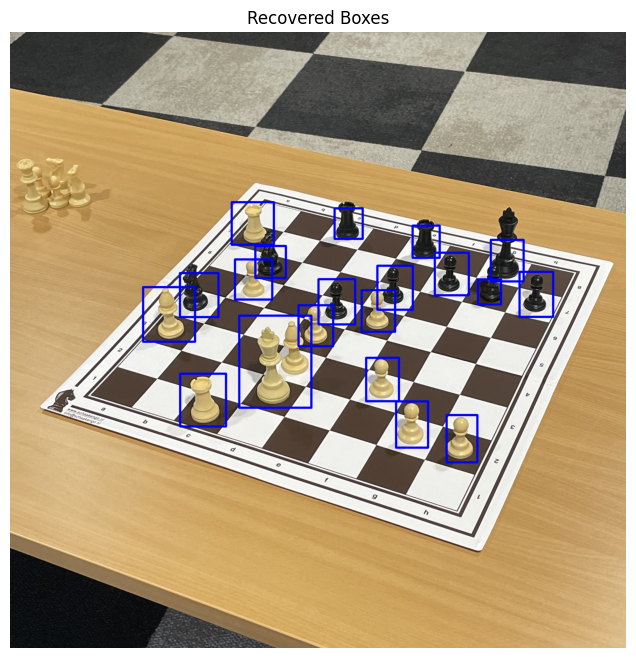

In [ ]:
def warp_boxes_back_to_original(bboxes, M_inv):

    all_pts = []
    for box in bboxes:
        x1, y1, x2, y2 = box
        all_pts.extend([
            [x1, y1],
            [x2, y1],
            [x2, y2],
            [x1, y2]
        ])

    pts_array = np.array(all_pts, dtype='float32').reshape(-1, 1, 2)

    M_inv = M_inv.astype(np.float32)

    warped_back = cv2.perspectiveTransform(pts_array, M_inv)

    recovered_boxes = []
    for i in range(0, len(warped_back), 4):
        pts = warped_back[i:i+4].reshape(-1, 2)
        xs = pts[:, 0]
        ys = pts[:, 1]
        recovered_boxes.append([
            int(min(xs)), int(min(ys)),
            int(max(xs)), int(max(ys))
        ])

    return recovered_boxes

def shrink_box_width(box, factor=0.60):
    x1, y1, x2, y2 = box
    cx = (x1 + x2) / 2
    half_w = (x2 - x1) * factor / 2
    return [int(cx - half_w), y1, int(cx + half_w), y2]

# Invert the perspective transform matrix
M_inv = np.linalg.inv(M).astype(np.float32)

# Recover the boxes to the original image
recovered_boxes = warp_boxes_back_to_original(white_bounding_boxes + black_bounding_boxes, M_inv)

# Shrink the width of the boxes because when we apply the perspective transform, the boxes are too wide
recovered_boxes = [shrink_box_width(box) for box in recovered_boxes]

recovered_image = image.copy()
for box in recovered_boxes:
    print(f"X1: {box[0]}, Y1: {box[1]}, X2: {box[2]}, Y2: {box[3]}")
    cv2.rectangle(recovered_image, (box[0], box[1]), (box[2], box[3]), (255, 0, 0), 10)

plt.figure(figsize=(8, 8))
plt.title("Recovered Boxes")
plt.imshow(cv2.cvtColor(recovered_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
